# Get the data

In [ ]:
!gdown --id 1HVSazFk8m553VWPjFnZZ-YfJA_KecPea
!unzip translated_data_updated.zip

Downloading...
From: https://drive.google.com/uc?id=1HVSazFk8m553VWPjFnZZ-YfJA_KecPea
To: /content/translated_data_updated.zip
100% 122M/122M [00:01<00:00, 78.6MB/s]
Archive:  translated_data_updated.zip
   creating: data_translated/
  inflating: data_translated/coupon_visit_train.csv  
  inflating: data_translated/coupon_list_train.csv  
  inflating: data_translated/prefecture_locations.csv  
  inflating: data_translated/coupon_area_test.csv  
  inflating: data_translated/coupon_detail_train.csv  
  inflating: data_translated/coupon_area_train.csv  
  inflating: data_translated/user_list.csv  
  inflating: data_translated/coupon_list_test.csv  


In [ ]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(context='notebook', style='darkgrid')

In [ ]:
# Important Note:
# Visits = browsing history in the training period. No test set available. 
# Purchases = purchase history in the training period. No test set available.

df_users        = pd.read_csv('data_translated/user_list.csv')
df_c_list_train = pd.read_csv('data_translated/coupon_list_train.csv')
df_c_list_test  = pd.read_csv('data_translated/coupon_list_test.csv')
df_area_train   = pd.read_csv('data_translated/coupon_area_train.csv')
df_area_test    = pd.read_csv('data_translated/coupon_area_test.csv')
df_visit_train  = pd.read_csv('data_translated/coupon_visit_train.csv')
df_purch_train  = pd.read_csv('data_translated/coupon_detail_train.csv')
df_locations    = pd.read_csv('data_translated/prefecture_locations.csv')

## Feature Engineering
#### User List

In [ ]:
# rename SEX_ID column, change to categorical value (0 Male, 1 Female)
df_users['SEX'] = df_users['SEX_ID'].replace('f', 1)
df_users['SEX'] = df_users['SEX'].replace('m', 0)

In [ ]:
# create a categorical variable for age group:
# 14-21, 22-35, 36-49, 50-65, 66-75, 76-90
def age_cat(age):
  if age <= 21:
    return 0
  elif age <= 35:
    return 1
  elif age <= 49:
    return 2
  elif age <= 65:
    return 3
  elif age <= 75:
    return 4
  elif age <= 90:
    return 5
  else:
    return 6

lbl_age_ranges = ['14-21', '22-35', '36-49', '50-65', '66-75', '76-90'] 

df_users['AGE_GROUP'] = [age_cat(a) for a in df_users['AGE']]

In [ ]:
df_users.head()

,Unnamed: 0,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,USER_ID_hash,PREF_NAME_EN,SEX,AGE_GROUP
0,0,2012-03-28 14:14:18,f,25,NaN,d9dca3cb44bab12ba313eaa681f663eb,NaN,1,1
1,1,2011-05-18 00:41:48,f,34,NaN,560574a339f1b25e57b0221e486907ed,Tokyo,1,1
2,2,2011-06-13 16:36:58,m,41,NaN,e66ae91b978b3229f8fd858c80615b73,Aichi Prefecture,0,2
3,3,2012-02-08 12:56:15,m,25,NaN,43fc18f32eafb05713ec02935e2c2825,NaN,0,1
4,4,2011-05-22 23:43:56,m,62,NaN,dc6df8aa860f8db0d710ce9d4839840f,Kanagawa Prefecture,0,3


In [ ]:
df_purch_train.head(5)

,Unnamed: 0,ITEM_COUNT,I_DATE,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,SMALL_AREA_NAME_EN
0,0,1,2012-03-28 15:06:06,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,Hyogo
1,1,1,2011-07-04 23:52:54,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,"Ginza, Shinbashi, Tokyo, Ueno"
2,2,1,2011-07-16 00:52:49,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,Ebisu / Meguro / Shinagawa
3,3,1,2011-07-16 00:54:53,2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,Ebisu / Meguro / Shinagawa
4,4,1,2011-07-16 00:55:52,4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,Ebisu / Meguro / Shinagawa


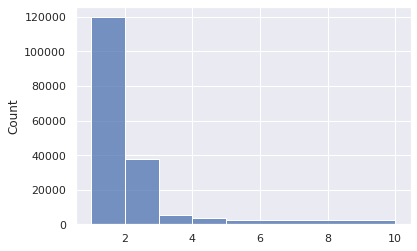

In [ ]:
p = df_purch_train.drop(columns=['Unnamed: 0', 'I_DATE', 'PURCHASEID_hash', 'COUPON_ID_hash', 'SMALL_AREA_NAME_EN'])
p = p.sort_values(by=['ITEM_COUNT'], ascending=False)

l = p['ITEM_COUNT'].to_numpy()
sns.histplot(l, bins=[1,2,3,4,5,10])

In [ ]:
# create random baseline 
# this code is unrelated to the EDA, just useful to have
user_list = df_users['USER_ID_hash']

rows = []
for u in user_list:
  coupon_list = df_c_list_test.sample(n=10, replace=False)['COUPON_ID_hash']
  coupon_list_str = ' '.join(coupon_list)
  
  row = {'USER_ID_hash': u, 'PURCHASED_COUPONS': coupon_list_str}
  rows.append(row)
  
df_pred = pd.DataFrame.from_dict(rows)
df_pred.to_csv('sample_submission.csv', header=True, index=False)

In [ ]:
user_list.head()

0    d9dca3cb44bab12ba313eaa681f663eb
1    560574a339f1b25e57b0221e486907ed
2    e66ae91b978b3229f8fd858c80615b73
3    43fc18f32eafb05713ec02935e2c2825
4    dc6df8aa860f8db0d710ce9d4839840f
Name: USER_ID_hash, dtype: object

In [ ]:
# let's call this user 'Yuna': 560574a339f1b25e57b0221e486907ed
# Registered a month before the training data period started
# Lives in Tokyo, so probably lots of local coupons
# She bought 16 coupons during the training period
# Female - age 34
yuna = df_users[df_users['USER_ID_hash'] == '560574a339f1b25e57b0221e486907ed']
yuna

,Unnamed: 0,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,USER_ID_hash,PREF_NAME_EN,SEX,AGE_GROUP
1,1,2011-05-18 00:41:48,f,34,NaN,560574a339f1b25e57b0221e486907ed,Tokyo,1,1


In [ ]:
# Coupons Yuna has bought
c_yuna = df_purch_train[df_purch_train['USER_ID_hash'] == '560574a339f1b25e57b0221e486907ed']
len(c_yuna)

16

In [ ]:
# More details about Yuna's purchases
c_yuna.head()

,Unnamed: 0,ITEM_COUNT,I_DATE,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,SMALL_AREA_NAME_EN
1,1,1,2011-07-04 23:52:54,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,"Ginza, Shinbashi, Tokyo, Ueno"
2,2,1,2011-07-16 00:52:49,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,Ebisu / Meguro / Shinagawa
3,3,1,2011-07-16 00:54:53,2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,Ebisu / Meguro / Shinagawa
4,4,1,2011-07-16 00:55:52,4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,Ebisu / Meguro / Shinagawa
5,5,1,2011-07-16 00:57:09,d8b030c8a4a2c1051997092a2985b373,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,Ebisu / Meguro / Shinagawa


In [ ]:
# OK, we need more info from the coupon list, so let's join them. 
df_purch_details = df_c_list_train.set_index('COUPON_ID_hash').join(df_purch_train.set_index('COUPON_ID_hash'), lsuffix='_caller', rsuffix='_other')
c_yuna_details = df_purch_details[df_purch_details['USER_ID_hash'] == '560574a339f1b25e57b0221e486907ed']
print(len(c_yuna_details))
c_yuna_details.head(5)

16


,Unnamed: 0_caller,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,CAPSULE_TEXT_EN,GENRE_NAME_EN,LARGE_AREA_NAME_EN,SMALL_AREA_NAME_EN_caller,KEN_NAME_EN,Unnamed: 0_other,ITEM_COUNT,I_DATE,PURCHASEID_hash,USER_ID_hash,SMALL_AREA_NAME_EN_other
COUPON_ID_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
129a696dac8e7eb0903f02ae217c636e,15551,50,750,370,2012-03-27 12:00:00,2012-03-31 12:00:00,4,2012-04-01,2012-09-26,178.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Restaurant,Gourmet dining,Kanto,"Shibuya, Aoyama, Jiyugaoka",Tokyo,12.0,1.0,2012-03-31 01:31:08,c80173987b3515b63b90617aad48a4d3,560574a339f1b25e57b0221e486907ed,"Shibuya, Aoyama, Jiyugaoka"
259a22533cab381464c89f616a56d12d,3770,71,6237,1800,2011-09-05 12:00:00,2011-09-08 12:00:00,3,2011-09-10,2012-02-29,172.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Restaurant,Gourmet dining,Kanto,"Shibuya, Aoyama, Jiyugaoka",Tokyo,7.0,2.0,2011-09-07 00:04:47,5a45d62c72a4cc4155786b03bec74c96,560574a339f1b25e57b0221e486907ed,"Shibuya, Aoyama, Jiyugaoka"
34ea3cc1cf4ec57f3547c5fcd4de3abe,14122,50,3120,1550,2012-03-08 12:00:00,2012-03-13 12:00:00,5,2012-03-14,2012-09-08,178.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Restaurant,Gourmet dining,Kanto,"Ginza, Shinbashi, Tokyo, Ueno",Tokyo,11.0,2.0,2012-03-13 00:29:18,6f0b1da67d70392cbd8fb40740371a76,560574a339f1b25e57b0221e486907ed,"Ginza, Shinbashi, Tokyo, Ueno"
3e7d148d632f7ee123504e37d3ee9c66,10370,62,12000,4500,2012-01-14 12:00:00,2012-01-17 12:00:00,3,2012-01-18,2012-04-07,80.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Restaurant,Gourmet dining,Kanto,"Shibuya, Aoyama, Jiyugaoka",Tokyo,10.0,2.0,2012-01-15 20:53:59,231e87e928a48403a92783780010aef9,560574a339f1b25e57b0221e486907ed,"Shibuya, Aoyama, Jiyugaoka"
4257a8a169b40bbbcb002ec47ab3de13,8477,55,4470,1980,2011-12-01 12:00:00,2011-12-05 12:00:00,4,2011-12-06,2012-06-01,178.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,Relaxation,Relaxation,Kanto,Ebisu / Meguro / Shinagawa,Tokyo,9.0,1.0,2011-12-01 16:53:45,509883c481716b1f3abeac8372b36a5d,560574a339f1b25e57b0221e486907ed,Ebisu / Meguro / Shinagawa


In [1]:
genres = c_yuna_details.groupby('GENRE_NAME_EN').size()
g = genres.to_frame().reset_index()
g.columns = ['Genre', 'Count']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(ax=ax, x=g['Genre'], y=g['Count'])
plt.yticks(range(1,10))
plt.title("Coupons purchased by 'Yuna' (16 total)")

NameError: ignored